In [ ]:
#import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### downloading the data set from kaggle into drive

In [ ]:
# ignore this section I used it because i was working on colab not jupyter

In [ ]:
#it is done only once and I already did it so we won't be needing this section again
#os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Kaggle/red_wine_quality'

In [ ]:
# cd /content/drive/My Drive/Kaggle/red_wine_quality

In [ ]:
# !kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

In [ ]:
# !unzip \*.zip  && rm *.zip

### data preprocessing

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Kaggle/red_wine_quality/winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#if we're dropping a column for some reason
#df.drop(df.columns[0], 1)

In [ ]:
df['quality'].nunique()

6

In [ ]:
inf = df.info()
inf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#is there any column that contains a nan/null value
df.isna().any().any()

False

In [ ]:
#now we convert the quality data column from range values into catagorical data
bins = (0,6.5,8)#here we define the borders of our catagories the first one starts at 0 and ends at 6.5 and the second 6.5-8
group_names = ['bad', 'good']#now we give labels to our catagories
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)#and voila

In [ ]:
#we check to see if what we did actually works
df['quality'].unique()#we find the unique values in the column

[bad, good]
Categories (2, object): [bad < good]

In [ ]:
#getting the numbber of the good and bad samples
df.groupby("quality").count()["fixed acidity"]

quality
bad     1382
good     217
Name: fixed acidity, dtype: int64

In [ ]:
#now we encode bad and good with numerical values(0,1)
lable = LabelEncoder()

df['quality'] = lable.fit_transform(df['quality'])

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
#we can use this function to get the count of each unique value instead of the cumbersome method used previously
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

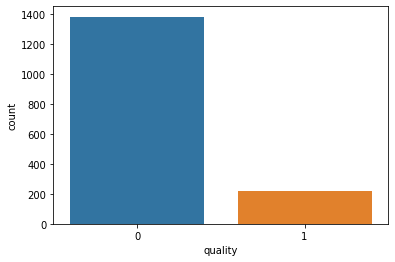

In [ ]:
sns.countplot(df['quality'])#a nice bar graph. skewed though

In [ ]:
#splitting our data into features and lables
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
#and now we get our training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


In [ ]:
#now we scale/standardize our data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
#in case you're wondering why we're normalizing after splitting the data and not before check the links
#https://datascience.stackexchange.com/questions/54908/data-normalization-before-or-after-train-test-split
# https://machinelearningmastery.com/data-leakage-machine-learning/

In [ ]:
x_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

## Random forests classifier

In [ ]:
rfc = RandomForestClassifier()

rfc = rfc.fit(x_train,y_train)
prdc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,prdc))
print(confusion_matrix(y_test,prdc))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       273
           1       0.64      0.38      0.48        47

    accuracy                           0.88       320
   macro avg       0.77      0.67      0.71       320
weighted avg       0.86      0.88      0.86       320

[[263  10]
 [ 29  18]]


## Support vector classifier

In [ ]:
sv = svm.SVC()

sv = sv.fit(x_train, y_train)
prdc = sv.predict(x_test)

In [ ]:
print(classification_report(y_test, prdc))
print(confusion_matrix(y_test, prdc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


## neural network

In [ ]:
import tensorflow as tf

In [ ]:
#we build our model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu, input_shape=(1279, 11)))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(64, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

In [ ]:
model.compile(optimizer= 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1279, 128)         1536      
_________________________________________________________________
dense_52 (Dense)             (None, 1279, 128)         16512     
_________________________________________________________________
dense_53 (Dense)             (None, 1279, 64)          8256      
_________________________________________________________________
dense_54 (Dense)             (None, 1279, 32)          2080      
_________________________________________________________________
dense_55 (Dense)             (None, 1279, 1)           33        
Total params: 28,417
Trainable params: 28,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
40/40 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8030
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8686
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2771 - accuracy: 0.8843
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8882
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2586 - accuracy: 0.8898
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8944
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9046
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2330 - accuracy: 0.9054
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2256 - accuracy: 0.9070
Epoch 10/20
40/40 [==============================] - 0s 2ms/step - loss: 0.2126 - accuracy: 0.9124
Epoch 11/20
40/40 [

In [ ]:
model.evaluate(x_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 0.2913 - accuracy: 0.9031


[0.2913447320461273, 0.903124988079071]

In [ ]:
#and now we save our model
model.save('/content/drive/My Drive/Kaggle/red_wine_quality/red_wine_model.h')
#you need to save your model once and after that you can use it directly on new data with the need to redo all the previous stuff

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Kaggle/red_wine_quality/red_wine_model.h/assets


In [ ]:
from tensorflow.keras.models import load_model

mymodel = load_model('/content/drive/My Drive/Kaggle/red_wine_quality/red_wine_model.h')
#we load the model we previously saved

In [ ]:
mymodel.evaluate(x_test,y_test)#yup that's our model right there ready to serve
#and we use it to evaluate our test set just to check that it works